# Recherche du meilleur modèle HistGradientBoostingClassifier sur 4 classes

### Imports

In [1]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

## Import des scripts python
import sys
import os
sys.path.append(os.path.abspath('../../python_scripts/'))

#import load_datas
import train_model as train
import save_model as saveModel
#import pickle_model

# Rechargement en cas de modification
import importlib
importlib.reload(train)
importlib.reload(saveModel)
#importlib.reload(pickle_model)

<module 'save_model' from '/Users/thierno/Documents/DataScientest/Final_Project/MAR24_CDS_Accidents/Notebooks/Entrainements/python_scripts/save_model.py'>

### Chargement des datasets

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd

pd.set_option('display.max_columns', None)

#df = pd.read_csv("../../data/accidents_data.zip", compression=dict(method='zip', archive_name='accidents_data.csv'))

#display(df.head())

#X = df.drop(columns=['grav'])
#y = df['grav']


X_train = pd.read_csv("../../../../Data/X_train.zip", compression=dict(method='zip', archive_name='X_train.csv'))
y_train = pd.read_csv("../../../../Data/y_train.zip", compression=dict(method='zip', archive_name='y_train.csv'))['grav']

X_test = pd.read_csv("../../../../Data/X_test.zip", compression=dict(method='zip', archive_name='X_test.csv'))
y_test = pd.read_csv("../../../../Data/y_test.zip", compression=dict(method='zip', archive_name='y_test.csv'))['grav']

print("X_train shape :",X_train.shape)
print("X_test shape :",X_test.shape)


X_train shape : (352893, 337)
X_test shape : (88224, 337)


### Rééquilibrage du dataset d'entrainement 

In [3]:
from imblearn.under_sampling import RandomUnderSampler

ro = RandomUnderSampler(random_state=1024)
X_train_ru, y_train_ru = ro.fit_resample(X_train,y_train)

### HistGradientBoostingClassifier: modèle par défaut 

Temps d'entraînement : 11.38 seconds
Classification_Report: HistGradientBoostingClassifier_Default


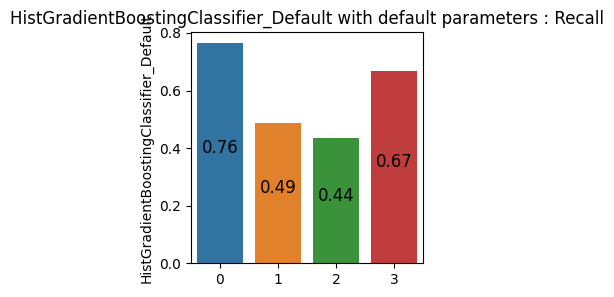

,0,1,2,3,Training_Time,Best_Params
HistGradientBoostingClassifier_Default,0.764091,0.487457,0.435034,0.667075,11.381066,Default


(HistGradientBoostingClassifier(random_state=42),
                                                0         1         2  \
 HistGradientBoostingClassifier_Default  0.764091  0.487457  0.435034   
 
                                                3  Training_Time Best_Params  
 HistGradientBoostingClassifier_Default  0.667075      11.381066     Default  )

In [4]:
from sklearn.ensemble import HistGradientBoostingClassifier

train.fit("HistGradientBoostingClassifier_Default",
          HistGradientBoostingClassifier(random_state=42),
          X_train_ru,
          y_train_ru,
          X_test,
          y_test)


### HistGradientBoostingClassifier : Grid Search

Temps d'entraînement : 4.22 minutes
Classification_Report: HistGradientBoostingClassifier_Grid


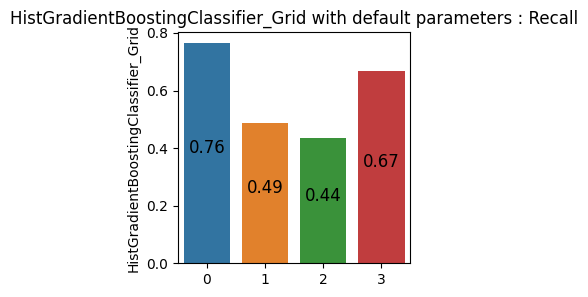

*** Best Param : {'learning_rate': 0.1, 'max_depth': None} ***


,0,1,2,3,Training_Time,Best_Params
HistGradientBoostingClassifier_Grid,0.764091,0.487457,0.435034,0.667075,253.290288,"{'learning_rate': 0.1, 'max_depth': None}"


In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.ensemble import HistGradientBoostingClassifier

param_grid = {
    'learning_rate': [0.001,0.01, 0.1, 0.3],      # Taux d'apprentissage
    'max_depth': [None,3, 5, 7],                 # Profondeur maximale des arbres

}

best_model, df_result = train.fit_grid_search("HistGradientBoostingClassifier_Grid",
                               HistGradientBoostingClassifier(random_state=42),
                               param_grid,
                               5,
                               X_train_ru,
                               y_train_ru,
                               X_test,
                               y_test)



### Sauvegarde du meilleur modèle 

In [6]:
import joblib

file_name = "best_models/HistGradientBoosting_4_classes.gz"
saveModel.save(best_model, file_name)


### Test du chargement du modèle sauvegardé

In [7]:
from sklearn.metrics import classification_report

# Chargement du modele
#model = joblib.load(model_filename_gz)
model = saveModel.load(file_name)
# Prediction du model
y_pred = model.predict(X_test)

# Évaluation du modèle
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.76      0.76     36264
           1       0.70      0.49      0.58     35517
           2       0.39      0.44      0.41     13992
           3       0.15      0.67      0.25      2451

    accuracy                           0.60     88224
   macro avg       0.50      0.59      0.50     88224
weighted avg       0.66      0.60      0.61     88224

